In [1]:
from evaluation import *
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [11]:
data_path = '../../stream_graph_data/nx_graphs/small/'

# get all files in datapath 
# all_files = [f for f in listdir(data_path) if isfile(join(data_path, f))]

step = 1/9

with open('../../stream_graph_data/thresholds_small_for_newman_mod.csv') as f:
    networks = f.readlines()
    networks = [network.strip().split(',') for network in networks]

for network in networks:
    network_name = network[0] + '.pkl'
    init = float(network[1])
    merg = float(network[2])
    
    g = nx.read_gpickle(data_path + network_name)
    g.name = network_name.split('.')[0]
    
    info = nx.info(g)
    density = nx.density(g)
    print(info)
    print('density: ' + str(density))
          
    # thresholdSearch function returns the scores (dict) with scores and info about clusters 
    # for every combination of initial and merging threshold values
    # also saves all scores to pkl
    
    
    d = thresholdSearch(g, network_name = network_name, 
                    initial_start=init-step, initial_stop=init+step, initial_num=10, 
                    merging_start=merg-step, merging_stop=merg+step, merging_num=10)

    # turn scores (dict) into dataframe
    df = pd.DataFrame.from_dict(d, orient='index')

    # sort by score to get best score
    df = df.sort_values(by='newman_mod', ascending=False)
    initial_t = df.initial_threshold.iloc[0]
    merging_t = df.merging_threshold.iloc[0]
    
    # type of fitness here
    highest_score = df.newman_mod.iloc[0]
    
    initial_clusters = df.clusters_found.iloc[0]
    clusters_merged = df.clusters_merged.iloc[0]
    final_clusters = df.remaining_clusters.iloc[0]
    
    print('initial_threshold: ' + str(initial_t))
    print('merging_threshold: ' + str(merging_t))
    print('highest_score:' + str(highest_score))
    print('initial_clusters:' + str(initial_clusters))
    print('clusters_merged:' + str(clusters_merged))
    print('remaining_clusters:' + str(final_clusters))
    
    communities = louvain(g)
    mod = evaluation.newman_girvan_modularity(g,communities)
    print('louvain: ' +  str(mod.score))
    print('')
    
    f = open('out_small_newman_mod.txt', 'a+')
    f.write('{},{},{},{},{},{},{},{}\n'.format(density, initial_t, merging_t, highest_score, initial_clusters, clusters_merged, final_clusters, mod.score))
    f.close()

## graph loaded from nx serialized object

In [5]:
g = nx.read_gpickle('../../stream_graph_data/nx_graphs/harvey/ca-GrQc.pkl')
print(nx.info(g))
print(nx.density(g))

Name: 
Type: Graph
Number of nodes: 5242
Number of edges: 14496
Average degree:   5.5307
0.001055278280507905


## Calculate fitness scores

In [ ]:
d = thresholdSearch(g, network_name = network_name, 
                    initial_start=0, initial_stop=1, initial_num=10, 
                    merging_start=0, merging_stop=1, merging_num=10, log=False)

## findClusters example

In [6]:
first_th = 0.08
second_th = 0.8

fps, fmap = findClusters(g, first_th)
print('clusters found: ' + str(len(fmap)))

merged_fps, merged_fmap = mergeFingerprints(fps, fmap, second_th)
print('clusters merged: ' + str(len(fmap)-len(merged_fmap)))
print('remaining clusters: ' + str(len(merged_fmap)))

clusters found: 985
clusters merged: 2
remaining clusters: 983


In [8]:
# load scores (dict) from pkl file
with open('../../stream_graph_data/networks_ground_truth_communities/aug17_clusters.pkl', 'rb') as f:
    d = pickle.load(f)

In [40]:
# turn scores (dict) into dataframe
df = pd.DataFrame.from_dict(d, orient='index')

# sort by score to see best score
df = df.sort_values(by='score', ascending=False)
df.head()

,initial_threshold,merging_threshold,score,clusters_found,clusters_merged,remaining_clusters
98,0.315789,0.210526,0.479789,59,13,46
99,0.315789,0.263158,0.479392,59,8,51
100,0.315789,0.315789,0.474279,59,4,55
101,0.315789,0.368421,0.471491,59,1,58
103,0.315789,0.473684,0.471225,59,0,59


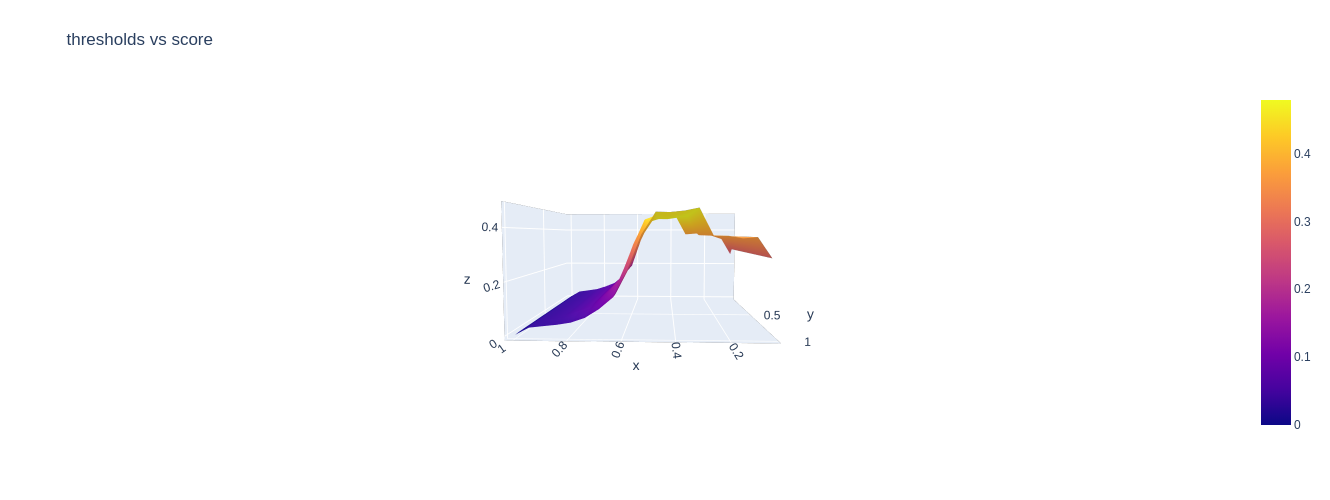

In [34]:
import scipy 
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# 2D-arrays from DataFrame
x1 = np.linspace(df['initial_threshold'].min(), df['initial_threshold'].max(), len(df['initial_threshold'].unique()))
y1 = np.linspace(df['merging_threshold'].min(), df['merging_threshold'].max(), len(df['merging_threshold'].unique()))

"""
x, y via meshgrid for vectorized evaluation of
2 scalar/vector fields over 2-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.
"""

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = scipy.interpolate.griddata((df['initial_threshold'], df['merging_threshold']), df['score'], (x2, y2), method='cubic')

# Ready to plot
fig = go.Figure(data=[go.Surface(z=z2, x=x2, y=y2)])
fig.update_layout(title='thresholds vs score', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

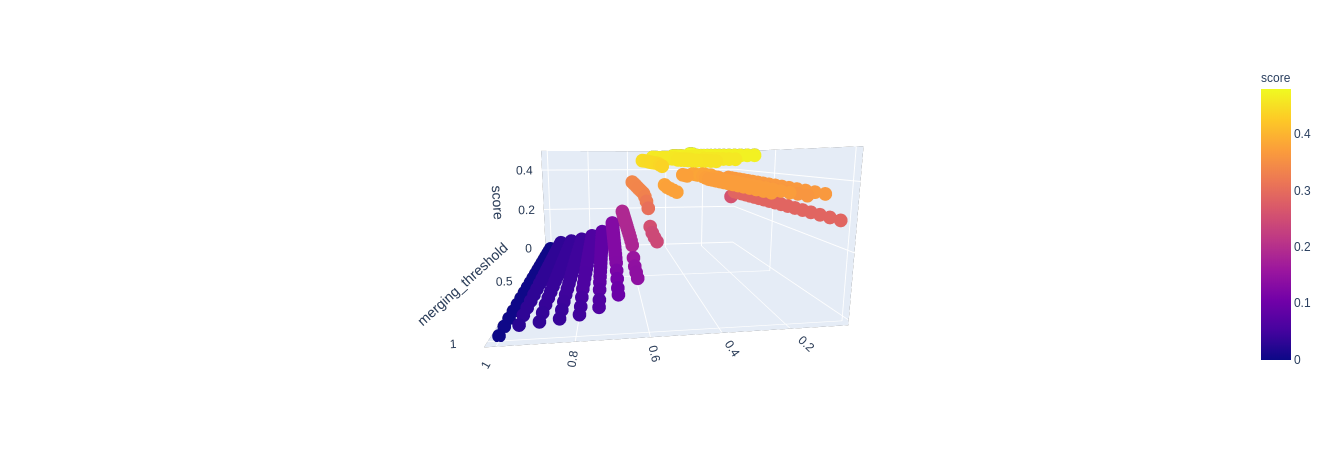

In [43]:
import plotly.express as px
fig = px.scatter_3d(df, x='initial_threshold', y='merging_threshold', z='score',
                    color='score')
fig.show()

## CDlib evaluation

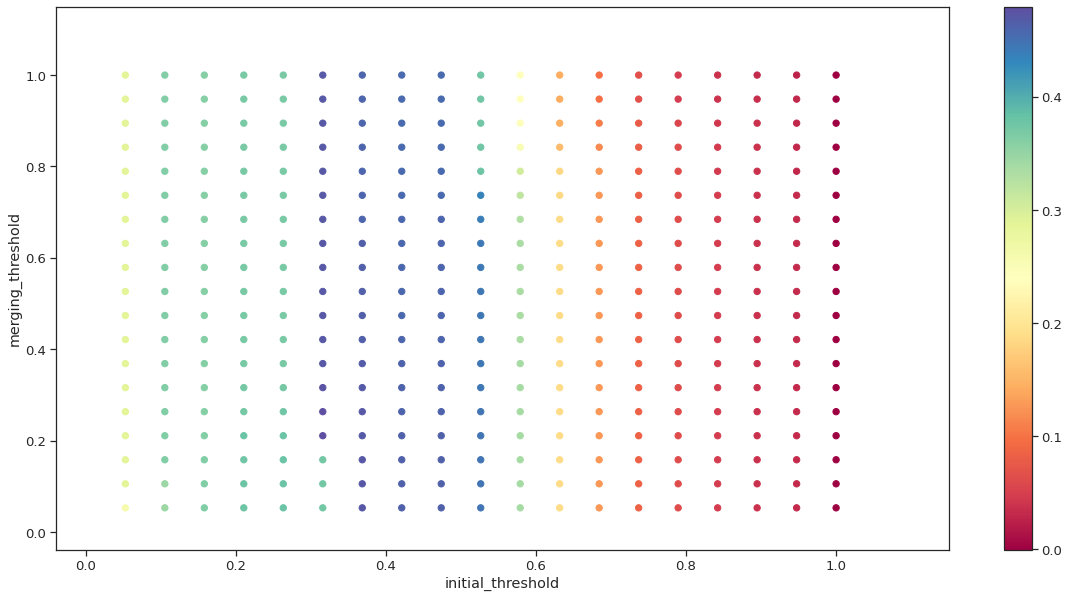

In [31]:
plotScores(df, network_name)

In [35]:
# email with Louvain
communities = louvain(g)
mod = evaluation.newman_girvan_modularity(g,communities)
mod.score

0.5599609849145684

## Plot and save graph as png

In [ ]:
plotGraph(g, network_name, data_path)

In [39]:
import pandas as pd
dfd = pd.read_csv('../../stream_graph_data/density_score.csv')
dfd.head()

,network,init_th,merg_th,mod_score,density,louvan_mod
0,AUG17,0.315789,0.210526,0.479789,0.096748,0.716127
1,AUG18,0.111111,0.111111,0.508254,0.092698,0.534442
2,AUG19,0.111111,0.222222,0.510418,0.085873,0.534555
3,AUG23,0.333333,0.111111,0.507912,0.075750,0.523315
4,AUG24,0.333333,0.111111,0.477702,0.094901,0.505359


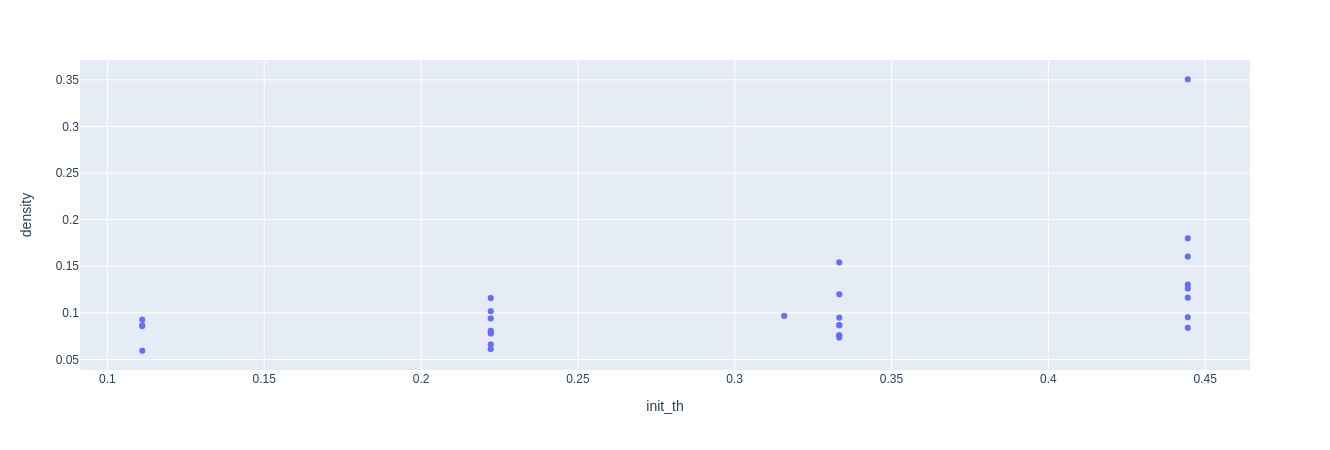

In [41]:
import plotly.express as px
fig = px.scatter(dfd, x='init_th', y='density')
fig.show()

In [32]:
import pandas as pd
dfd = pd.read_csv('../../stream_graph_data/densities.csv')

In [33]:
dfd = dfd.sort_values(by='density', ascending=False)
dfd.shape

(91, 5)

In [37]:
dfd.head(10)

,Name,Category,nodes,edges,density
80,Sep07,harvey,1887,1506559,0.846647
29,Haggle,HumanContact,274,28244,0.755167
38,Kangaroo,Animal,17,91,0.669118
32,Highland tribes,HumanSocial,16,58,0.483333
55,Windsurfers,HumanContact,43,336,0.372093
76,Sep10,harvey,6350,7067454,0.350602
60,Zebra,Animal,27,111,0.316239
35,Infectious,HumanContact,410,17298,0.206309
69,Sep11,harvey,3375,1024752,0.179982
72,Sep09,harvey,4545,1656812,0.160447


In [34]:
dfd.density.describe()

count    91.000000
mean      0.084018
std       0.152962
min       0.000001
25%       0.000343
50%       0.011649
75%       0.093384
max       0.846647
Name: density, dtype: float64

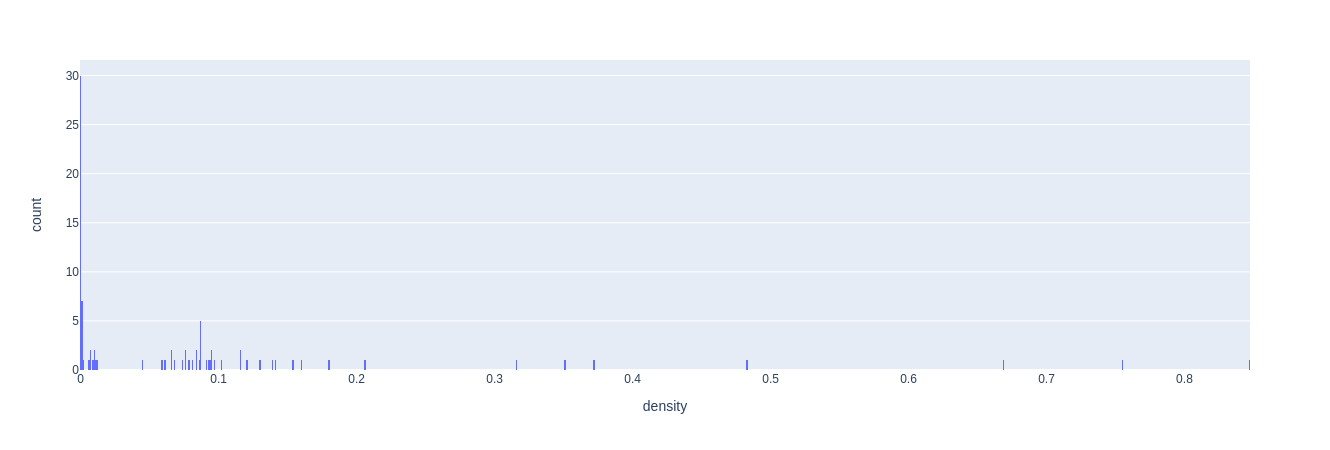

In [35]:
import plotly.express as px

fig = px.histogram(dfd, x='density', nbins=1000)
fig.show()

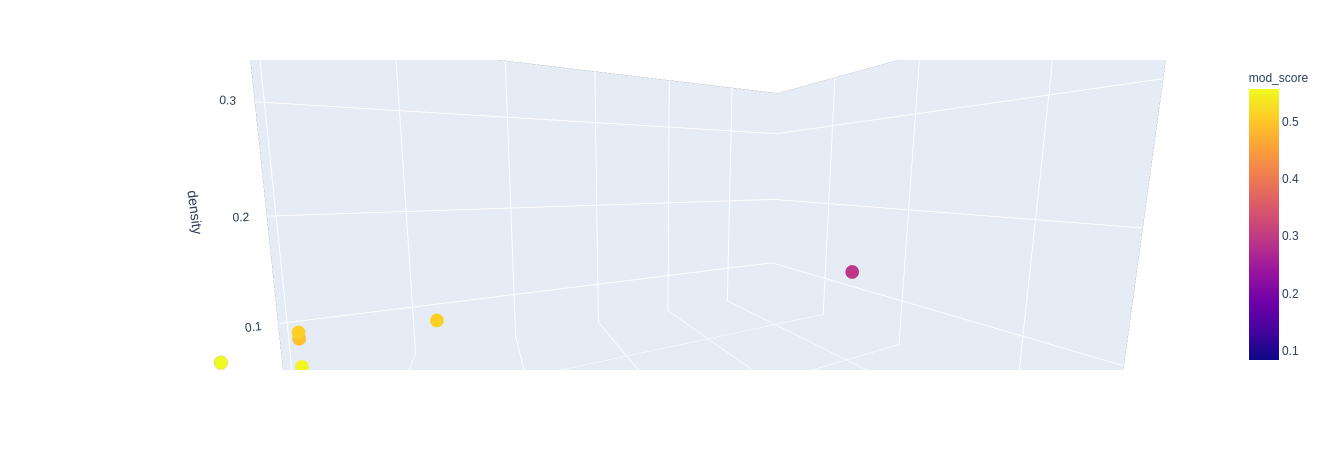

In [65]:
import plotly.express as px
fig = px.scatter_3d(dfd, x='init_th', y='merg_th', z='density',
                    color='mod_score')
fig.show()

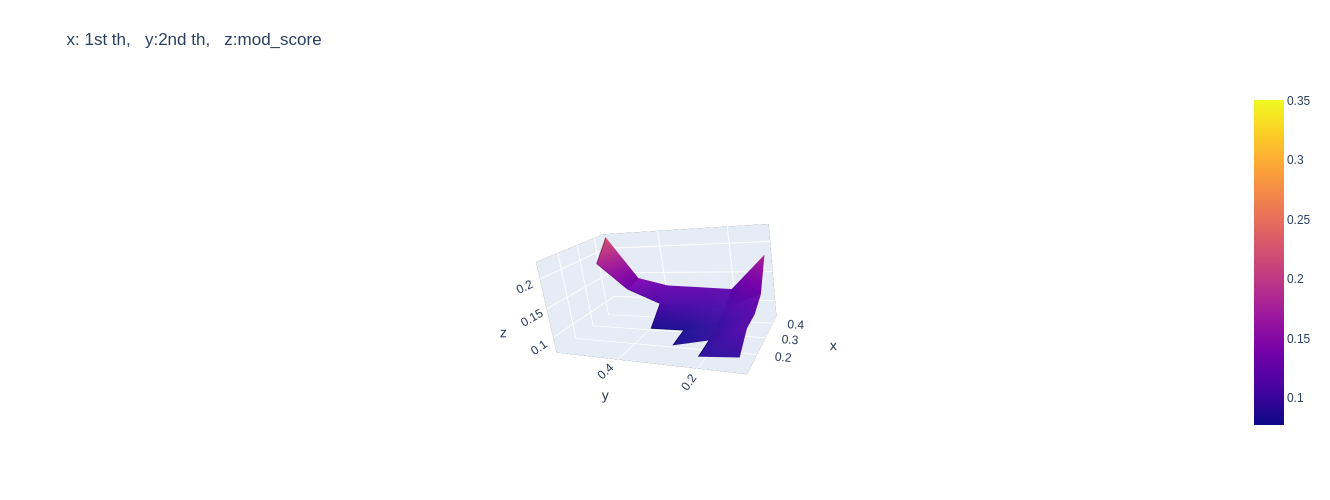

In [98]:
import scipy 
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# 2D-arrays from DataFrame
x1 = np.linspace(dfd['init_th'].min(), dfd['init_th'].max(), len(dfd['init_th'].unique()))
y1 = np.linspace(dfd['merg_th'].min(), dfd['merg_th'].max(), len(dfd['merg_th'].unique()))

"""
x, y via meshgrid for vectorized evaluation of
2 scalar/vector fields over 2-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.
"""

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = scipy.interpolate.griddata((dfd['init_th'], dfd['merg_th']), dfd['density'], (x2, y2), method='cubic')

# Ready to plot
fig = go.Figure(data=[go.Surface(z=z2, x=x2, y=y2)])
fig.update_layout(title='x: 1st th,   y:2nd th,   z:mod_score', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()